# Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generating Sinc Function

In [3]:
def sinc_function(x):
    return np.where(x == 0, 1.0, np.sin(x) / x)

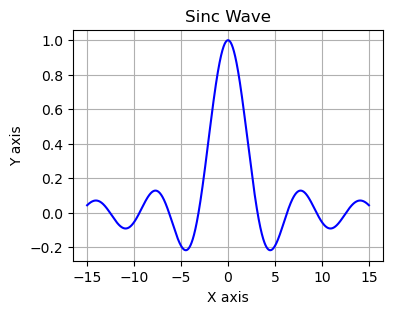

In [4]:
X_range = np.linspace(-15, 15, 10000).reshape(-1, 1)
Y_range = sinc_function(X_range)
plt.figure(figsize=(4, 3))
plt.plot(X_range, Y_range, 'b-')
plt.title('Sinc Wave')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()
plt.close()

# Sampling The Function

In [5]:
def generate_samples(n_samples, x_range=(-15, 15)):
    x = np.linspace(x_range[0], x_range[1], n_samples)
    y_true = sinc_function(x)
    return x, y_true

In [6]:
n_samples_list=[100, 300, 1000]
x_samples = {}
y_true_samples = {}
for n_samples in n_samples_list:
    x, y_true = generate_samples(n_samples)
    x_samples[n_samples] = x
    y_true_samples[n_samples] = y_true

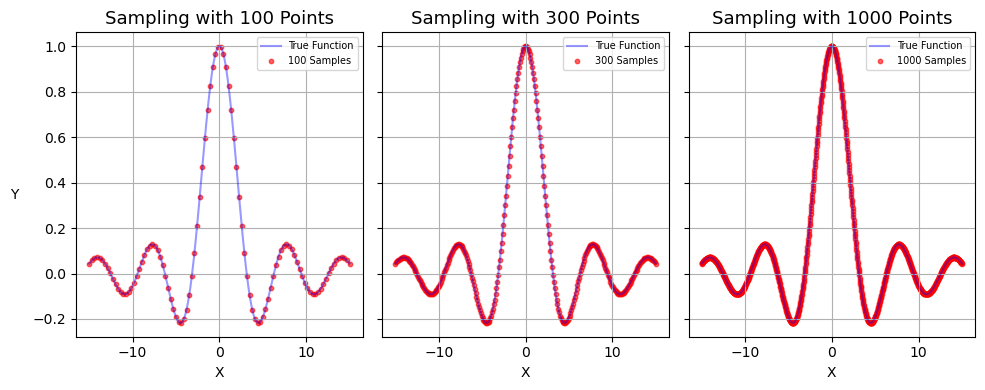

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
fig.supylabel('Y ', rotation=0, fontsize=10)

for i in range(3):
    axes[i].plot(X_range, Y_range, 'b-', alpha=0.4, label='True Function')
    axes[i].scatter(x_samples[n_samples_list[i]], y_true_samples[n_samples_list[i]], 
                     c='red', s=10, alpha=0.6, label=f'{n_samples_list[i]} Samples')
    axes[i].set_xlabel('X', fontsize=10)
    axes[i].set_title(f'Sampling with {n_samples_list[i]} Points', fontsize=13)
    axes[i].grid(True)
    axes[i].legend(fontsize=7)

plt.tight_layout()
plt.show()

# Add Gaussian Noise

In [8]:
def add_noise(y_true, noise_level='Clean'):
    if noise_level == 'Clean':
        variance = 0.01
    else:  # noisy
        variance = 0.1
    return y_true + np.random.normal(0, np.sqrt(variance), len(y_true))

In [9]:
noisy_y_true_samples = {}
for n_samples in n_samples_list:
    noisy_y_true = add_noise(y_true_samples[n_samples])
    noisy_y_true_samples[n_samples] = noisy_y_true

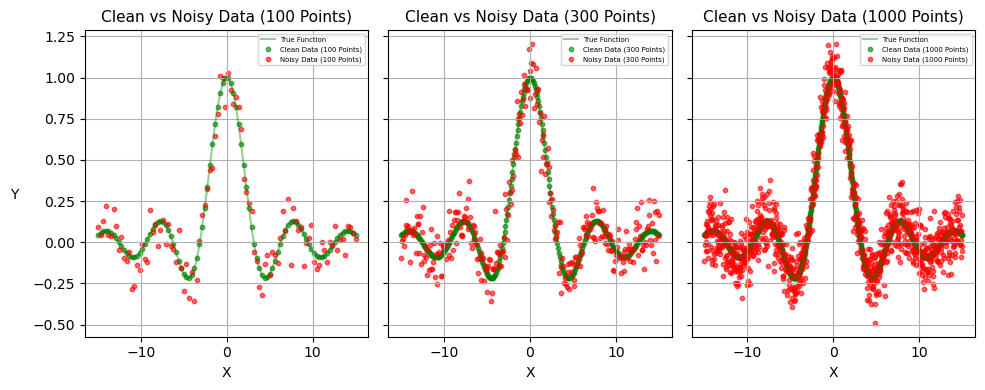

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
fig.supylabel('Y ', rotation=0, fontsize=10)

for i in range(3):
    axes[i].plot(X_range, Y_range, 'g-', alpha=0.4, label='True Function')
    axes[i].scatter(x_samples[n_samples_list[i]], y_true_samples[n_samples_list[i]], 
                     c='green', s=10, alpha=0.6, label=f'Clean Data ({n_samples_list[i]} Points)')
    axes[i].scatter(x_samples[n_samples_list[i]], noisy_y_true_samples[n_samples_list[i]], 
                     c='red', s=10, alpha=0.6, label=f'Noisy Data ({n_samples_list[i]} Points)')
    axes[i].set_xlabel('X', fontsize=10)
    axes[i].set_title(f'Clean vs Noisy Data ({n_samples_list[i]} Points)', fontsize=11)
    axes[i].grid(True)
    axes[i].legend(fontsize=5)

plt.tight_layout()
plt.show()